# Análise exploratória dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Leitura e exploração do arquivo 'agencias.csv'

In [2]:
agencias = pd.read_csv('agencias.csv')
agencias

,cod_agencia,nome,endereco,cidade,uf,data_abertura,tipo_agencia
0,7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital
1,1,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física
2,2,Agência Tatuapé,"Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...",São Paulo,SP,2010-06-14,Física
3,3,Agência Campinas,"Av. Francisco Glicério, 895 - Vila Lidia, Camp...",Campinas,SP,2012-03-04,Física
4,4,Agência Osasco,"Av. Antônio Carlos Costa, 1000 - Bela Vista, O...",Osasco,SP,2013-11-06,Física
5,5,Agência Porto Alegre,"Av. Bento Gonçalves, 1924 - Partenon, Porto Al...",Porto Alegre,RS,2013-12-01,Física
6,6,Agência Rio de Janeiro,"R. Sen. Dantas, 15 - Centro, Rio de Janeiro - ...",Rio de Janeiro,RJ,2015-04-01,Física
7,8,Agência Jardins,"Av. Brg. Faria Lima, 2491 - Jardim Paulistano,...",São Paulo,SP,2018-01-09,Física
8,9,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,2019-10-09,Física
9,10,Agência Recife,"Av. Conselheiro Aguiar, 4432 - Boa Viagem, Rec...",Recife,PE,2021-10-09,Física


In [3]:
agencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cod_agencia    10 non-null     int64 
 1   nome           10 non-null     object
 2   endereco       10 non-null     object
 3   cidade         10 non-null     object
 4   uf             10 non-null     object
 5   data_abertura  10 non-null     object
 6   tipo_agencia   10 non-null     object
dtypes: int64(1), object(6)
memory usage: 692.0+ bytes


### Convertendo a coluna data_abertura para o tipo date_time para poder fazer análises temporais

In [4]:
agencias['data_abertura'] = pd.to_datetime(agencias['data_abertura'], errors='coerce')

In [5]:
print(agencias['data_abertura'].head())

0   2015-08-01
1   2010-01-01
2   2010-06-14
3   2012-03-04
4   2013-11-06
Name: data_abertura, dtype: datetime64[ns]


In [6]:
print(agencias['data_abertura'].dtype)

datetime64[ns]


In [7]:
agencias['ano_abertura'] = agencias['data_abertura'].dt.year

In [8]:
print(agencias[['data_abertura', 'ano_abertura']].head())

  data_abertura  ano_abertura
0    2015-08-01          2015
1    2010-01-01          2010
2    2010-06-14          2010
3    2012-03-04          2012
4    2013-11-06          2013


Existem valores nulos?

In [9]:
print(agencias['data_abertura'].isnull().sum())

0


### Distribuição das agências: Digital e Física

In [10]:
print(agencias['tipo_agencia'].value_counts())

tipo_agencia
Física     9
Digital    1
Name: count, dtype: int64


Há nove agências físicas e uma digital.

### Distribuição das agências: cidade e estado

In [11]:
print(agencias['cidade'].value_counts())
print(agencias['uf'].value_counts())

cidade
São Paulo         4
Campinas          1
Osasco            1
Porto Alegre      1
Rio de Janeiro    1
Florianópolis     1
Recife            1
Name: count, dtype: int64
uf
SP    6
RS    1
RJ    1
SC    1
PE    1
Name: count, dtype: int64


A maioria das agências está localizada em São Paulo.

## Leitura e exploração do arquivo 'clientes.csv'

In [12]:
clientes = pd.read_csv('clientes.csv')
clientes

,cod_cliente,primeiro_nome,ultimo_nome,email,tipo_cliente,data_inclusao,cpfcnpj,data_nascimento,endereco,cep
0,28,Sabrina,Dias,moreiraemanuelly@example.org,PF,2017-04-03 16:11:00 UTC,357.081.496-39,2006-08-11,Praia de Duarte Vila Piratininga 81327-166 Fer...,95140-704
1,674,Luiz Felipe,Dias,pedroferreira@example.org,PF,2021-02-10 13:27:00 UTC,085.196.374-93,1995-10-11,"Avenida da Rosa, 654 João Paulo Ii 20295449 Nu...",76516-765
2,693,Renan,Dias,ogomes@example.net,PF,2020-01-21 13:12:00 UTC,783.416.059-10,1948-11-19,Jardim de Rodrigues Ipiranga 14161-477 Duarte ...,51779625
3,743,Clara,Dias,rafaelcorreia@example.org,PF,2019-05-06 11:39:00 UTC,589.237.610-95,1978-01-27,"Colônia Thomas Silva, 9 Tupi B 15771-946 Ferna...",19615792
4,769,André,Dias,danilo33@example.org,PF,2017-01-07 14:53:00 UTC,459.608.721-02,1990-08-25,"Rua Correia, 889 Diamante 59123250 Aragão / RS",01672838
...,...,...,...,...,...,...,...,...,...,...
993,730,Bárbara,da Conceição,enzo-gabrielcardoso@example.com,PF,2019-05-02 11:22:00 UTC,019.385.267-59,1966-03-06,"Chácara de Martins, 85 Mantiqueira 26805-573 A...",08264521
994,772,Daniel,da Conceição,raquel97@example.com,PF,2017-06-08 11:13:00 UTC,240.581.396-33,1971-07-20,"Pátio de Souza, 8 Vila Puc 47056676 Duarte / MS",55045-265
995,837,Theo,da Conceição,ninacastro@example.org,PF,2014-03-18 10:30:00 UTC,058.734.129-79,1944-06-03,"Loteamento Pires, 4 Jardim Felicidade 69804-76...",88159-361
996,845,Pedro Lucas,da Conceição,silveirabruno@example.com,PF,2020-12-16 15:14:00 UTC,347.028.591-88,1943-12-12,"Travessa Eloah Moura, 97 Alta Tensão 2ª Seção ...",36211-005


In [13]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cod_cliente      998 non-null    int64 
 1   primeiro_nome    998 non-null    object
 2   ultimo_nome      998 non-null    object
 3   email            998 non-null    object
 4   tipo_cliente     998 non-null    object
 5   data_inclusao    998 non-null    object
 6   cpfcnpj          998 non-null    object
 7   data_nascimento  998 non-null    object
 8   endereco         998 non-null    object
 9   cep              998 non-null    object
dtypes: int64(1), object(9)
memory usage: 78.1+ KB


#### Convertendo datas para o tipo datetime para análises temporais

In [14]:
clientes['data_inclusao'] = pd.to_datetime(clientes['data_inclusao'])
clientes['data_nascimento'] = pd.to_datetime(clientes['data_nascimento'])

In [15]:
print(clientes['data_inclusao'].dtype)
print(clientes['data_nascimento'].dtype)

datetime64[ns, UTC]
datetime64[ns]


### Todos os clientes são pessoas físicas?

In [16]:
tipo_cliente = clientes['tipo_cliente'].value_counts()
tipo_cliente

tipo_cliente
PF    998
Name: count, dtype: int64

### Distribuição da quantidade de clientes por ano de inclusão

In [17]:
clientes['ano_inclusao'] = clientes['data_inclusao'].dt.year
ano_inclusao_counts = clientes['ano_inclusao'].value_counts().sort_index()
print(ano_inclusao_counts)


ano_inclusao
2010     11
2011     24
2012     32
2013     46
2014     48
2015     66
2016     74
2017     96
2018    102
2019    113
2020    112
2021    135
2022    139
Name: count, dtype: int64


#### Visualização gráfica

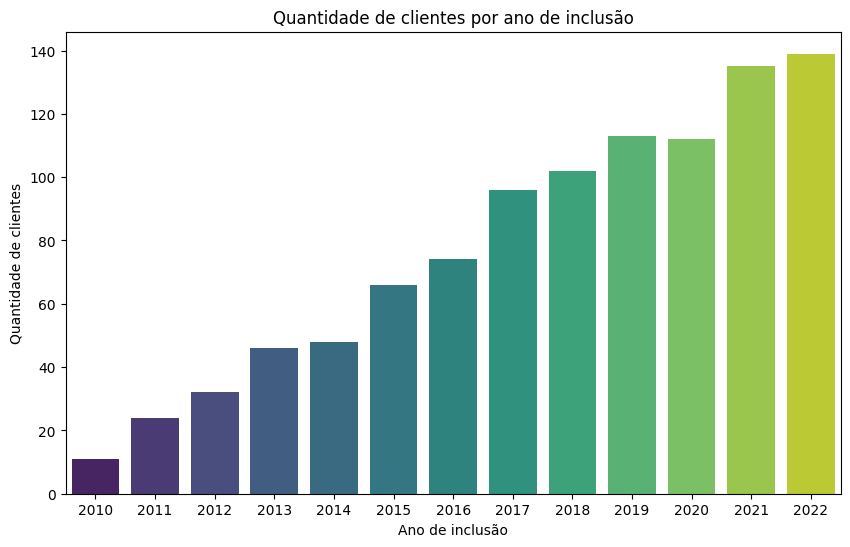

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='ano_inclusao', data=clientes, palette='viridis')
plt.title('Quantidade de clientes por ano de inclusão')
plt.xlabel('Ano de inclusão')
plt.ylabel('Quantidade de clientes')
plt.show()

### Distribuição da quantidade de clientes por ano de nascimento

In [19]:
clientes['ano_nascimento'] = clientes['data_nascimento'].dt.year
ano_nascimento_counts = clientes['ano_nascimento'].value_counts().sort_index()
print(ano_nascimento_counts)

ano_nascimento
1942    10
1943    16
1944    16
1945    13
1946    15
        ..
2003    16
2004     8
2005    19
2006    17
2007     6
Name: count, Length: 66, dtype: int64


Visualização gráfica de clientes por faixa etária

In [20]:
def calcular_idade(data_nascimento, data_referencia):
    idade = data_referencia.year - data_nascimento.year
    if (data_referencia.month, data_referencia.day) < (data_nascimento.month, data_nascimento.day):
        idade -= 1
    return idade

In [21]:
hoje = datetime.now()
clientes['idade'] = clientes['data_nascimento'].apply(lambda x: calcular_idade(x, hoje))

In [22]:
menor_idade = clientes['idade'].min()
menor_idade

17

In [23]:
bins_clientes = [17, 25, 35, 45, 60, 100]
labels_clientes = ['17-25', '26-35', '36-45', '46-60', '61+']

clientes['faixa_etaria'] = pd.cut(clientes['idade'], bins=bins_clientes, labels=labels_clientes, right=True)

In [24]:
faixa_etaria_qtd = clientes['faixa_etaria'].value_counts().sort_index()
print(faixa_etaria_qtd)

faixa_etaria
17-25    124
26-35    146
36-45    157
46-60    220
61+      336
Name: count, dtype: int64


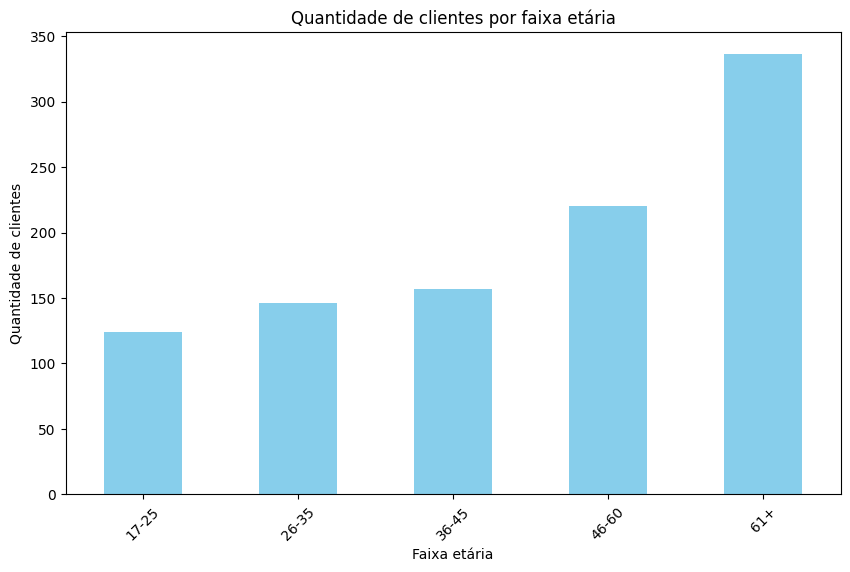

In [25]:
plt.figure(figsize=(10, 6))
faixa_etaria_qtd.plot(kind='bar', color='skyblue')
plt.title('Quantidade de clientes por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade de clientes')
plt.xticks(rotation=45)
plt.show()

## Leitura e exploração do arquivo colaborador_agencia.csv

In [26]:
colaborador_agencia = pd.read_csv('colaborador_agencia.csv')
colaborador_agencia

,cod_colaborador,cod_agencia
0,7,1
1,13,1
2,14,1
3,23,1
4,24,1
...,...,...
95,82,10
96,89,10
97,95,10
98,99,10


In [27]:
colaborador_agencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   cod_colaborador  100 non-null    int64
 1   cod_agencia      100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


Quantos colaboradores estão associados a cada agência?

In [28]:
colaborador_por_agencia = colaborador_agencia['cod_agencia'].value_counts().sort_index()
colaborador_agencia

,cod_colaborador,cod_agencia
0,7,1
1,13,1
2,14,1
3,23,1
4,24,1
...,...,...
95,82,10
96,89,10
97,95,10
98,99,10


In [29]:
colaborador_por_agencia = colaborador_agencia['cod_agencia'].value_counts().sort_index()
colaborador_agencia

,cod_colaborador,cod_agencia
0,7,1
1,13,1
2,14,1
3,23,1
4,24,1
...,...,...
95,82,10
96,89,10
97,95,10
98,99,10


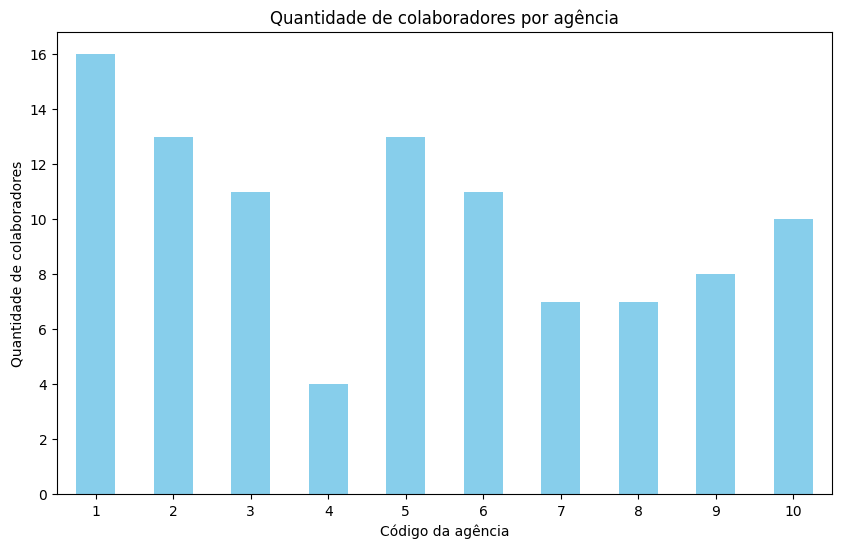

In [30]:
plt.figure(figsize=(10, 6))
colaborador_por_agencia.plot(kind='bar', color='skyblue')
plt.title('Quantidade de colaboradores por agência')
plt.xlabel('Código da agência')
plt.ylabel('Quantidade de colaboradores')
plt.xticks(rotation=0)
plt.show()

Para exibir no gráfico o nome das agências é preciso juntas os df

In [31]:
colaborador_por_agencia_merge = colaborador_agencia.merge(agencias, on='cod_agencia', how='left')

In [32]:
colaborador_por_agencia = colaborador_por_agencia_merge['nome'].value_counts().sort_index()
colaborador_agencia

,cod_colaborador,cod_agencia
0,7,1
1,13,1
2,14,1
3,23,1
4,24,1
...,...,...
95,82,10
96,89,10
97,95,10
98,99,10


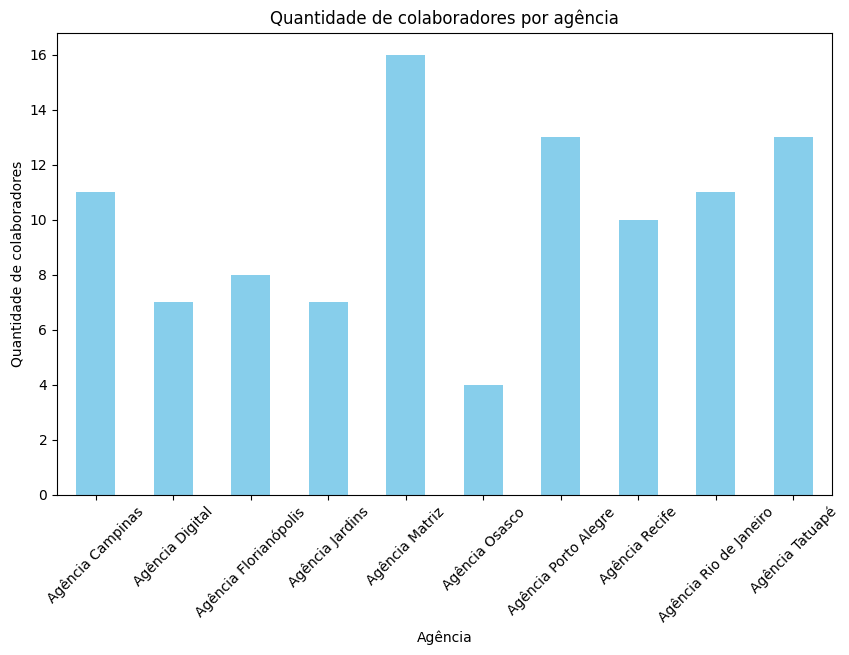

In [33]:
plt.figure(figsize=(10,6))
colaborador_por_agencia.plot(kind='bar', color='skyblue')
plt.title('Quantidade de colaboradores por agência')
plt.xlabel('Agência')
plt.ylabel('Quantidade de colaboradores')
plt.xticks(rotation=45)
plt.show()

## Leitura e exploração do arquivo colaboradores.csv

In [34]:
colaboradores = pd.read_csv('colaboradores.csv')
colaboradores

,cod_colaborador,primeiro_nome,ultimo_nome,email,cpf,data_nascimento,endereco,cep
0,14,Paulo,Dias,melissalopes@example.net,847.210.695-02,1974-04-24,"Lagoa de Rodrigues, 62 Zilah Sposito 37328-273...",27275674
1,19,Luiz Fernando,Dias,pcunha@example.net,820.415.963-33,1994-07-10,"Ladeira de Moreira, 82 Jardim Atlântico 27617-...",50013962
2,32,Vitor Hugo,Dias,aragaonicolas@example.net,936.172.548-37,1986-12-18,Área Sophie Moreira Maria Virgínia 71941-111 S...,08955-215
3,88,João Gabriel,Lima,luiz-otaviorezende@example.org,967.082.451-67,1994-10-19,"Trevo Murilo Ramos, 92 São Benedito 73615-597 ...",24224-305
4,39,Maria Eduarda,Melo,joao-pedro72@example.com,857.496.210-49,1996-03-01,"Parque de Moura, 65 Granja Werneck 67769059 da...",96896390
...,...,...,...,...,...,...,...,...
95,94,Melissa,Gonçalves,caldeirasamuel@example.com,825.670.139-03,1971-01-09,"Largo de Pinto, 96 Vila Independencia 2ª Seção...",66939-843
96,28,Alexandre,Nascimento,olivia97@example.org,719.360.824-03,1992-01-12,"Aeroporto Maria Cecília Rocha, 39 Serra Do Cur...",42178150
97,80,Clarice,Nascimento,lorena74@example.org,956.104.283-51,1995-12-01,"Rua de da Mota, 7 Vila Mantiqueira 17429735 Je...",40016475
98,27,Marcela,da Conceição,mcosta@example.com,139.467.025-70,1963-05-14,"Avenida de Campos, 513 Tres Marias 67624232 Co...",66423556


In [35]:
colaboradores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cod_colaborador  100 non-null    int64 
 1   primeiro_nome    100 non-null    object
 2   ultimo_nome      100 non-null    object
 3   email            100 non-null    object
 4   cpf              100 non-null    object
 5   data_nascimento  100 non-null    object
 6   endereco         100 non-null    object
 7   cep              100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [36]:
colaboradores['data_nascimento'] = pd.to_datetime(colaboradores['data_nascimento'])
colaboradores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cod_colaborador  100 non-null    int64         
 1   primeiro_nome    100 non-null    object        
 2   ultimo_nome      100 non-null    object        
 3   email            100 non-null    object        
 4   cpf              100 non-null    object        
 5   data_nascimento  100 non-null    datetime64[ns]
 6   endereco         100 non-null    object        
 7   cep              100 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 6.4+ KB


In [37]:
colaboradores['idade'] = colaboradores['data_nascimento'].apply(lambda x: calcular_idade(x, hoje))

In [38]:
print(colaboradores['idade'].describe())

count    100.000000
mean      43.590000
std       10.836801
min       26.000000
25%       33.000000
50%       45.000000
75%       53.250000
max       61.000000
Name: idade, dtype: float64


In [39]:
bins = [25, 35, 45, 55, 65]
labels = ['26-35', '36-45', '46-55', '56+' ]

colaboradores['faixa_etaria'] = pd.cut(colaboradores['idade'], bins=bins, labels=labels, right=True)

In [40]:
faixa_etaria_qtd = colaboradores['faixa_etaria'].value_counts().sort_index()

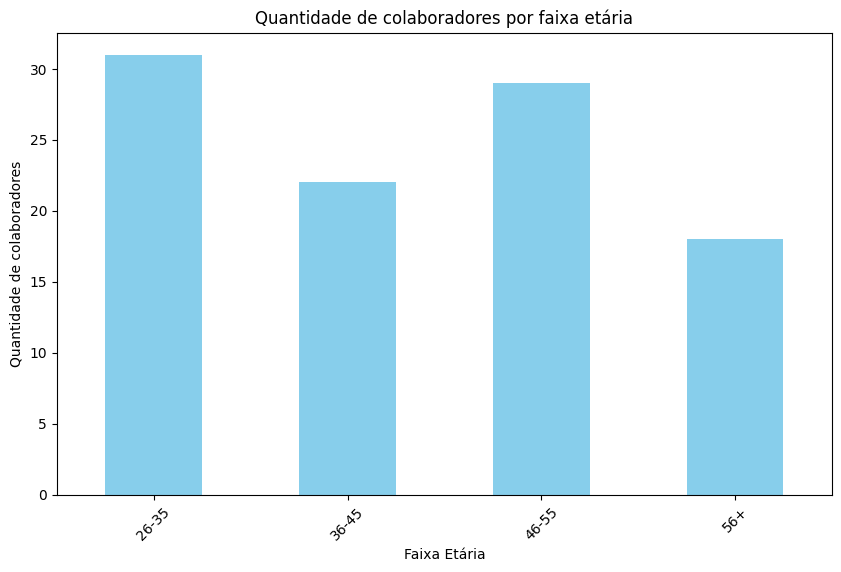

In [41]:
plt.figure(figsize=(10, 6))
faixa_etaria_qtd.plot(kind='bar', color='skyblue')
plt.title('Quantidade de colaboradores por faixa etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de colaboradores')
plt.xticks(rotation=45)
plt.show()

## Leitura e exploração do arquivo contas.csv

In [42]:
contas = pd.read_csv('contas.csv')
contas

,num_conta,cod_cliente,cod_agencia,cod_colaborador,tipo_conta,data_abertura,saldo_total,saldo_disponivel,data_ultimo_lancamento
0,53,53,1,7,PF,2011-05-24 15:30:00 UTC,2984.7615,2814.67,2019-07-02 11:03:46 UTC
1,190,190,1,7,PF,2014-10-17 14:48:00 UTC,4262.4322,4191.86,2021-03-25 12:00:15 UTC
2,191,191,1,7,PF,2013-03-23 14:14:00 UTC,3266.5680,3080.71,2016-09-09 23:34:15 UTC
3,203,203,1,7,PF,2016-08-03 16:13:00 UTC,21241.5424,19461.56,2022-12-28 07:58:24 UTC
4,254,254,1,7,PF,2012-10-24 13:48:00 UTC,13335.6966,13197.54,2013-12-20 22:20:00 UTC
...,...,...,...,...,...,...,...,...,...
994,466,466,10,8,PF,2022-10-26 14:13:00 UTC,7847.4165,9351.63,2022-12-30 00:00:00.319185 UTC
995,764,764,10,8,PF,2022-09-08 11:06:00 UTC,65495.1872,64823.14,2022-12-29 23:59:59.964121 UTC
996,488,488,10,18,PF,2022-07-16 10:16:00 UTC,8663.6081,6836.57,2022-12-30 00:00:00.966349 UTC
997,395,395,10,95,PF,2022-12-01 15:27:00 UTC,23156.2065,21578.33,2022-12-30 00:00:00.607818 UTC


In [43]:
contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_conta               999 non-null    int64  
 1   cod_cliente             999 non-null    int64  
 2   cod_agencia             999 non-null    int64  
 3   cod_colaborador         999 non-null    int64  
 4   tipo_conta              999 non-null    object 
 5   data_abertura           999 non-null    object 
 6   saldo_total             999 non-null    float64
 7   saldo_disponivel        999 non-null    float64
 8   data_ultimo_lancamento  999 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB


In [44]:
contas.head()

,num_conta,cod_cliente,cod_agencia,cod_colaborador,tipo_conta,data_abertura,saldo_total,saldo_disponivel,data_ultimo_lancamento
0,53,53,1,7,PF,2011-05-24 15:30:00 UTC,2984.7615,2814.67,2019-07-02 11:03:46 UTC
1,190,190,1,7,PF,2014-10-17 14:48:00 UTC,4262.4322,4191.86,2021-03-25 12:00:15 UTC
2,191,191,1,7,PF,2013-03-23 14:14:00 UTC,3266.5680,3080.71,2016-09-09 23:34:15 UTC
3,203,203,1,7,PF,2016-08-03 16:13:00 UTC,21241.5424,19461.56,2022-12-28 07:58:24 UTC
4,254,254,1,7,PF,2012-10-24 13:48:00 UTC,13335.6966,13197.54,2013-12-20 22:20:00 UTC


In [45]:
contas[['saldo_total', 'saldo_disponivel']].describe()

,saldo_total,saldo_disponivel
count,999.000000,999.000000
mean,26543.407216,25731.185586
std,41872.096136,40288.019468
min,1.221000,0.600000
25%,938.142000,918.485000
50%,11668.146700,11325.960000
75%,35410.108600,33926.210000
max,419923.177800,411617.060000


In [46]:
contas['tipo_conta'].value_counts()

tipo_conta
PF    999
Name: count, dtype: int64

In [47]:
contas['data_abertura'] = pd.to_datetime(contas['data_abertura'], errors='coerce')
contas['data_ultimo_lancamento'] = pd.to_datetime(contas['data_ultimo_lancamento'], errors='coerce')

In [48]:
contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   num_conta               999 non-null    int64              
 1   cod_cliente             999 non-null    int64              
 2   cod_agencia             999 non-null    int64              
 3   cod_colaborador         999 non-null    int64              
 4   tipo_conta              999 non-null    object             
 5   data_abertura           999 non-null    datetime64[ns, UTC]
 6   saldo_total             999 non-null    float64            
 7   saldo_disponivel        999 non-null    float64            
 8   data_ultimo_lancamento  478 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(2), int64(4), object(1)
memory usage: 70.4+ KB


In [49]:
print(clientes.columns)
print(agencias.columns)
print(colaboradores.columns)
print(contas.columns)

Index(['cod_cliente', 'primeiro_nome', 'ultimo_nome', 'email', 'tipo_cliente',
       'data_inclusao', 'cpfcnpj', 'data_nascimento', 'endereco', 'cep',
       'ano_inclusao', 'ano_nascimento', 'idade', 'faixa_etaria'],
      dtype='object')
Index(['cod_agencia', 'nome', 'endereco', 'cidade', 'uf', 'data_abertura',
       'tipo_agencia', 'ano_abertura'],
      dtype='object')
Index(['cod_colaborador', 'primeiro_nome', 'ultimo_nome', 'email', 'cpf',
       'data_nascimento', 'endereco', 'cep', 'idade', 'faixa_etaria'],
      dtype='object')
Index(['num_conta', 'cod_cliente', 'cod_agencia', 'cod_colaborador',
       'tipo_conta', 'data_abertura', 'saldo_total', 'saldo_disponivel',
       'data_ultimo_lancamento'],
      dtype='object')


In [50]:
contas_completo = contas.merge(clientes, left_on='cod_cliente', right_on='cod_cliente', suffixes=('_conta', '_cliente'))
contas_completo = contas_completo.merge(colaboradores, left_on='cod_colaborador', right_on='cod_colaborador', suffixes=('_conta', '_colaborador'))
contas_completo = contas_completo.merge(agencias, left_on='cod_agencia', right_on='cod_agencia', suffixes=('_conta', '_agencia'))

In [51]:
contas_completo.head()

,num_conta,cod_cliente,cod_agencia,cod_colaborador,tipo_conta,data_abertura_conta,saldo_total,saldo_disponivel,data_ultimo_lancamento,primeiro_nome_conta,...,cep_colaborador,idade_colaborador,faixa_etaria_colaborador,nome,endereco,cidade,uf,data_abertura_agencia,tipo_agencia,ano_abertura
0,53,53,1,7,PF,2011-05-24 15:30:00+00:00,2984.7615,2814.67,2019-07-02 11:03:46+00:00,Maria Alice,...,92465328,29,26-35,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física,2010
1,190,190,1,7,PF,2014-10-17 14:48:00+00:00,4262.4322,4191.86,2021-03-25 12:00:15+00:00,Juliana,...,92465328,29,26-35,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física,2010
2,191,191,1,7,PF,2013-03-23 14:14:00+00:00,3266.5680,3080.71,2016-09-09 23:34:15+00:00,Nicole,...,92465328,29,26-35,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física,2010
3,203,203,1,7,PF,2016-08-03 16:13:00+00:00,21241.5424,19461.56,2022-12-28 07:58:24+00:00,Otávio,...,92465328,29,26-35,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física,2010
4,254,254,1,7,PF,2012-10-24 13:48:00+00:00,13335.6966,13197.54,2013-12-20 22:20:00+00:00,Ana Carolina,...,92465328,29,26-35,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física,2010


In [52]:
print(contas_completo.columns)

Index(['num_conta', 'cod_cliente', 'cod_agencia', 'cod_colaborador',
       'tipo_conta', 'data_abertura_conta', 'saldo_total', 'saldo_disponivel',
       'data_ultimo_lancamento', 'primeiro_nome_conta', 'ultimo_nome_conta',
       'email_conta', 'tipo_cliente', 'data_inclusao', 'cpfcnpj',
       'data_nascimento_conta', 'endereco_conta', 'cep_conta', 'ano_inclusao',
       'ano_nascimento', 'idade_conta', 'faixa_etaria_conta',
       'primeiro_nome_colaborador', 'ultimo_nome_colaborador',
       'email_colaborador', 'cpf', 'data_nascimento_colaborador',
       'endereco_colaborador', 'cep_colaborador', 'idade_colaborador',
       'faixa_etaria_colaborador', 'nome', 'endereco', 'cidade', 'uf',
       'data_abertura_agencia', 'tipo_agencia', 'ano_abertura'],
      dtype='object')


Saldo médio por agência

In [53]:
saldo_medio_agencia = contas_completo.groupby('nome')[['saldo_total', 'saldo_disponivel']].mean()
saldo_medio_agencia

,saldo_total,saldo_disponivel
nome,,
Agência Campinas,25279.805032,25832.240000
Agência Digital,26168.032412,25172.050739
Agência Florianópolis,23320.187803,21164.487667
Agência Jardins,16223.089497,15987.414667
Agência Matriz,31165.301992,30021.365169
Agência Osasco,22967.100474,21955.214615
Agência Porto Alegre,27911.073703,26313.998689
Agência Recife,23168.514140,22585.202000
Agência Rio de Janeiro,23116.812135,22289.431923


Quantidade de contas por agência

In [54]:
qtd_contas_agencia = contas_completo['nome'].value_counts()
qtd_contas_agencia

nome
Agência Digital           460
Agência Matriz            118
Agência Tatuapé           101
Agência Campinas           76
Agência Osasco             65
Agência Porto Alegre       61
Agência Rio de Janeiro     52
Agência Jardins            30
Agência Florianópolis      30
Agência Recife              5
Name: count, dtype: int64

Quantidade de contas por colaborador

In [55]:
qtd_contas_colaborador = contas_completo['primeiro_nome_colaborador'] + ' ' + contas_completo['ultimo_nome_colaborador']
qtd_contas_colaborador = qtd_contas_colaborador.value_counts()
qtd_contas_colaborador

Luiz Henrique Rocha     84
Alice Aragão            69
Pietro Souza            67
Ana Júlia Jesus         62
Pietra da Mota          61
                        ..
Laís Aragão              1
Bruno da Paz             1
Maria Vitória Duarte     1
Juliana Cavalcanti       1
Lavínia Cunha            1
Name: count, Length: 94, dtype: int64

Data de abertura mais comum

In [56]:
data_abertura_comum = contas_completo['data_abertura_conta'].mode()
data_abertura_comum

0   2021-08-23 12:15:00+00:00
Name: data_abertura_conta, dtype: datetime64[ns, UTC]

Distribuição de saldos por faixa etária dos clientes

In [57]:
contas_completo['faixa_etaria_conta'] = pd.cut(contas_completo['idade_conta'], bins=bins_clientes, labels=labels_clientes, right=True)
saldo_faixa_etaria = contas_completo.groupby('faixa_etaria_conta')[['saldo_total', 'saldo_disponivel']].mean()
saldo_faixa_etaria

,saldo_total,saldo_disponivel
faixa_etaria_conta,,
17-25,31767.504665,31190.350323
26-35,27524.253011,26389.503699
36-45,30191.297311,29160.962229
46-60,22504.886900,21500.661409
61+,25559.034896,25020.374077


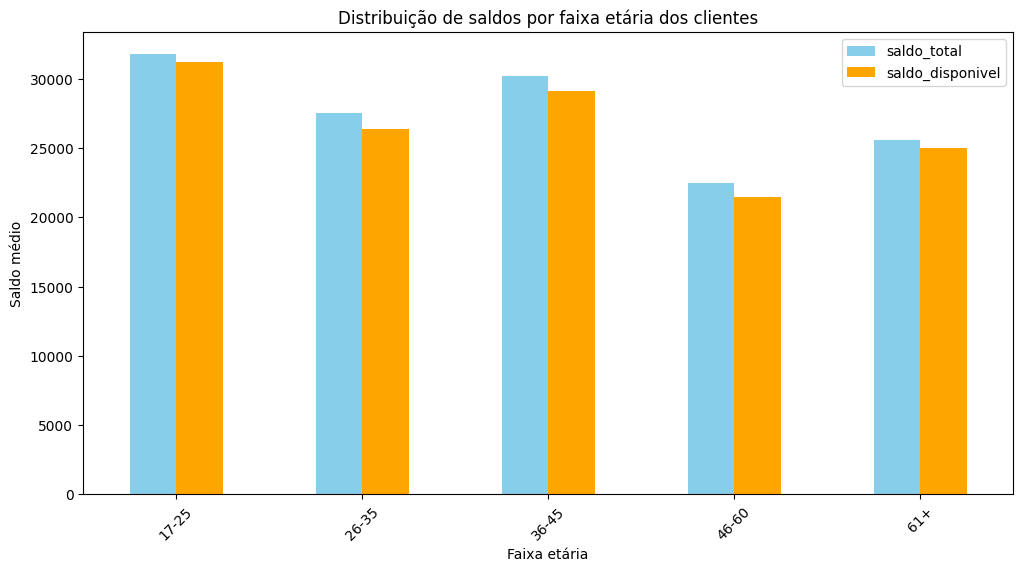

In [58]:
saldo_faixa_etaria.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Distribuição de saldos por faixa etária dos clientes')
plt.xlabel('Faixa etária')
plt.ylabel('Saldo médio')
plt.xticks(rotation=45)
plt.show()

nome
Agência Digital           460
Agência Matriz            118
Agência Tatuapé           101
Agência Campinas           76
Agência Osasco             65
Agência Porto Alegre       61
Agência Rio de Janeiro     52
Agência Jardins            30
Agência Florianópolis      30
Agência Recife              5
Name: count, dtype: int64


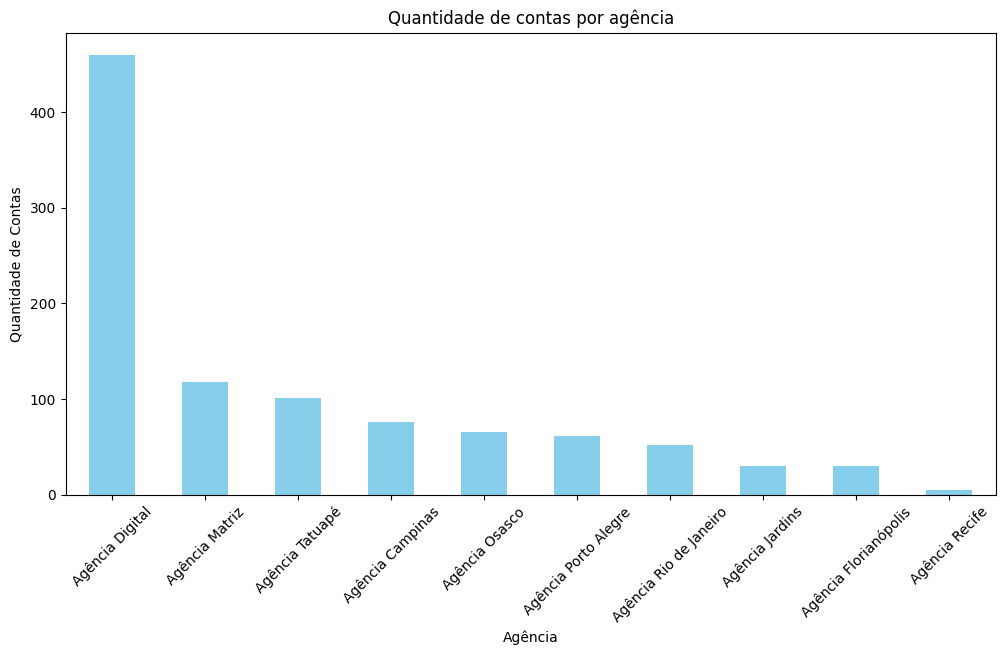

In [59]:
num_contas_agencia = contas_completo['nome'].value_counts()

print(num_contas_agencia)

num_contas_agencia.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Quantidade de contas por agência')
plt.xlabel('Agência')
plt.ylabel('Quantidade de Contas')
plt.xticks(rotation=45)
plt.show()

## Leitura e exploração do arquivo propostas_credito.csv

In [60]:
propostas_credito = pd.read_csv('propostas_credito.csv')
propostas_credito

,cod_proposta,cod_cliente,cod_colaborador,data_entrada_proposta,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,carencia,status_proposta
0,116,338,1,2014-05-30 18:43:12 UTC,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,0,Enviada
1,715,45,1,2021-06-17 13:09:32 UTC,0.0131,12897.538285,19848.55,6951.011715,232.124685,100,1,Enviada
2,755,494,1,2021-08-10 04:24:02 UTC,0.0203,122236.312551,187154.36,64918.047449,3673.518951,56,0,Enviada
3,953,381,1,2011-02-23 07:57:58 UTC,0.0167,47784.649757,59530.61,11745.960243,955.041560,109,3,Enviada
4,1046,176,1,2010-11-15 16:03:28 UTC,0.0211,178393.038243,214294.19,35901.151757,10219.659415,22,4,Enviada
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1758,176,99,2010-01-10 08:12:47 UTC,0.0133,96404.111608,184043.36,87639.248392,1673.386037,110,6,Validação documentos
1996,582,241,100,2019-02-25 05:03:22 UTC,0.0151,61292.834593,82684.29,21391.455407,2219.574245,36,2,Validação documentos
1997,970,106,100,2011-06-05 04:13:16 UTC,0.0225,100371.681790,152272.50,51900.818210,3482.000980,47,2,Validação documentos
1998,1361,814,100,2020-07-25 20:50:30 UTC,0.0227,45431.892941,74490.36,29058.467059,1326.031489,67,5,Validação documentos


In [61]:
propostas_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cod_proposta           2000 non-null   int64  
 1   cod_cliente            2000 non-null   int64  
 2   cod_colaborador        2000 non-null   int64  
 3   data_entrada_proposta  2000 non-null   object 
 4   taxa_juros_mensal      2000 non-null   float64
 5   valor_proposta         2000 non-null   float64
 6   valor_financiamento    2000 non-null   float64
 7   valor_entrada          2000 non-null   float64
 8   valor_prestacao        2000 non-null   float64
 9   quantidade_parcelas    2000 non-null   int64  
 10  carencia               2000 non-null   int64  
 11  status_proposta        2000 non-null   object 
dtypes: float64(5), int64(5), object(2)
memory usage: 187.6+ KB


In [62]:
propostas_credito['data_entrada_proposta'] = pd.to_datetime(propostas_credito['data_entrada_proposta'])

In [63]:
propostas_credito['data_entrada_proposta'].isnull().sum()

0

Total de propostas de crédito por status:

In [64]:
propostas_credito['status_proposta'].value_counts()

status_proposta
Enviada                 527
Aprovada                514
Validação documentos    491
Em análise              468
Name: count, dtype: int64

Total de propostas de crédito por mes e ano

In [65]:
propostas_credito['mes_ano'] = propostas_credito['data_entrada_proposta'].dt.to_period('M')
valor_proposta_mes_ano = propostas_credito.groupby('mes_ano')['valor_proposta'].sum()

C:\Users\joana\AppData\Local\Temp\ipykernel_14092\473285098.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  propostas_credito['mes_ano'] = propostas_credito['data_entrada_proposta'].dt.to_period('M')


In [66]:
valor_proposta_mes_ano

mes_ano
2010-01    1.362176e+06
2010-02    6.619363e+05
2010-03    1.119795e+06
2010-04    8.727709e+05
2010-05    1.791478e+06
               ...     
2022-08    1.154366e+06
2022-09    1.127940e+06
2022-10    4.012611e+05
2022-11    1.812027e+06
2022-12    5.584672e+05
Freq: M, Name: valor_proposta, Length: 156, dtype: float64

taxa de juros aprovada (media)

In [67]:
taxa_juros_aprovada = propostas_credito[propostas_credito['status_proposta'] == 'Aprovada']['taxa_juros_mensal'].mean()
taxa_juros_aprovada

0.016821011673151753

valor de financiamento (media)

In [68]:
media_valor_financiamento = propostas_credito['valor_financiamento'].mean()
media_valor_financiamento

124758.35585499999

## Leitura e exploração do arquivo transacoes.csv

In [69]:
transacoes = pd.read_csv('transacoes.csv')
transacoes

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
0,3100,256,2020-05-22 03:15:21 UTC,Saque,-130.0
1,28405,256,2021-06-29 11:52:38 UTC,Saque,-255.0
2,1776,512,2020-05-17 13:04:50 UTC,Saque,-250.0
3,14311,512,2020-09-06 02:55:34 UTC,Saque,-80.0
4,25012,512,2020-10-16 09:26:52 UTC,Saque,-475.0
...,...,...,...,...,...
71994,17007,764,2022-12-29 23:59:59.746608 UTC,Transferência entre CC - Crédito,82.3
71995,22320,764,2022-12-29 23:59:59.055028 UTC,Transferência entre CC - Crédito,414.8
71996,8697,509,2012-05-07 13:45:41 UTC,Transferência entre CC - Crédito,720.4
71997,11574,766,2015-09-19 05:13:07 UTC,Transferência entre CC - Crédito,1143.0


In [70]:
transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cod_transacao    71999 non-null  int64  
 1   num_conta        71999 non-null  int64  
 2   data_transacao   71999 non-null  object 
 3   nome_transacao   71999 non-null  object 
 4   valor_transacao  71999 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ MB


In [71]:
transacoes.head(50)

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
0,3100,256,2020-05-22 03:15:21 UTC,Saque,-130.0
1,28405,256,2021-06-29 11:52:38 UTC,Saque,-255.0
2,1776,512,2020-05-17 13:04:50 UTC,Saque,-250.0
3,14311,512,2020-09-06 02:55:34 UTC,Saque,-80.0
4,25012,512,2020-10-16 09:26:52 UTC,Saque,-475.0
5,26883,512,2020-11-09 00:47:27 UTC,Saque,-210.0
6,35017,512,2021-04-13 08:17:24 UTC,Saque,-50.0
7,46264,512,2021-05-01 06:25:50 UTC,Saque,-1160.0
8,21340,768,2020-02-14 21:42:15 UTC,Saque,-170.0
9,64259,1,2019-08-11 15:13:07 UTC,Saque,-245.0


In [72]:
transacoes.tail(50)

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
71949,12788,742,2020-09-12 20:52:18 UTC,Transferência entre CC - Crédito,99.7
71950,18347,742,2020-10-16 08:20:56 UTC,Transferência entre CC - Crédito,346.6
71951,63578,998,2015-12-02 23:54:16 UTC,Transferência entre CC - Crédito,293.9
71952,9491,487,2019-12-30 07:43:34 UTC,Transferência entre CC - Crédito,670.4
71953,34196,232,2017-10-26 01:54:38 UTC,Transferência entre CC - Crédito,683.8
71954,42996,232,2020-02-26 09:56:11 UTC,Transferência entre CC - Crédito,741.2
71955,34063,488,2022-12-30 00:00:00.296684 UTC,Transferência entre CC - Crédito,357.0
71956,31503,233,2017-05-22 18:54:16 UTC,Transferência entre CC - Crédito,518.8
71957,4525,234,2021-04-23 12:20:04 UTC,Transferência entre CC - Crédito,169.1
71958,12954,746,2021-10-10 20:52:16 UTC,Transferência entre CC - Crédito,648.4


Tentativa para tratar as datas com formatos diferentes

In [73]:
''' def converter_data(text):
    for fmt in ('%Y-%m-%d %H:%M:%S %Z', '%Y-%m-%d %H:%M:%S.%f %Z', '%Y-%m-%d %H:%M:%S'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    return None'''

" def converter_data(text):\n    for fmt in ('%Y-%m-%d %H:%M:%S %Z', '%Y-%m-%d %H:%M:%S.%f %Z', '%Y-%m-%d %H:%M:%S'):\n        try:\n            return datetime.strptime(text, fmt)\n        except ValueError:\n            pass\n    return None"

In [74]:
# transacoes['data_transacao'] = transacoes['data_transacao'].apply(converter_data)


In [75]:
#transacoes['data_transacao'] = pd.to_datetime(transacoes['data_transacao'], format='%Y-%m-%d %H:%M:%S.%f %Z', errors='coerce')

In [76]:
#transacoes['data_transacao'].isnull().sum()

In [77]:
from datetime import datetime

def converter_data(text):
    if isinstance(text, str):
        formatos = [
            '%Y-%m-%d %H:%M:%S %Z',            # Formato com fuso horário
            '%Y-%m-%d %H:%M:%S.%f %Z',         # Formato com microsegundos e fuso horário
            '%Y-%m-%d %H:%M:%S.%f',            # Formato com microsegundos, sem fuso horário
            '%Y-%m-%d %H:%M:%S.%f',            # Formato com milissegundos, sem fuso horário
            '%Y-%m-%d %H:%M:%S',               # Formato sem milissegundos e fuso horário
            '%Y-%m-%d %H:%M:%S.%f'             # Formato com milissegundos, sem fuso horário
        ]
        
        for fmt in formatos:
            try:
                return datetime.strptime(text, fmt)
            except ValueError:
                continue
                
    return None

In [78]:
transacoes['data_transacao'] = transacoes['data_transacao'].apply(converter_data)

In [79]:
nulos = transacoes['data_transacao'].isnull().sum()
print(f'Quantidade de valores nulos após a conversão: {nulos}')

if nulos > 0:
    invalid_dates = transacoes[transacoes['data_transacao'].isnull()]['data_transacao'].head(50)
    print('Amostra de valores não convertidos corretamente:')
    print(invalid_dates)

Quantidade de valores nulos após a conversão: 0


In [80]:
transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cod_transacao    71999 non-null  int64         
 1   num_conta        71999 non-null  int64         
 2   data_transacao   71999 non-null  datetime64[ns]
 3   nome_transacao   71999 non-null  object        
 4   valor_transacao  71999 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.7+ MB


In [81]:
transacoes.head()

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
0,3100,256,2020-05-22 03:15:21,Saque,-130.0
1,28405,256,2021-06-29 11:52:38,Saque,-255.0
2,1776,512,2020-05-17 13:04:50,Saque,-250.0
3,14311,512,2020-09-06 02:55:34,Saque,-80.0
4,25012,512,2020-10-16 09:26:52,Saque,-475.0


Qual dia da semana tem, em média, maior volume de transações?

In [82]:
transacoes['dia_semana'] = transacoes['data_transacao'].dt.day_name()
transacoes['periodo_mes'] = transacoes['data_transacao'].dt.day.apply(lambda x: 'Inicio' if x <= 15 else 'Final') 

In [83]:
volume_transacoes_dia = transacoes.groupby('dia_semana').size()
media_volume_transacoes_dia = transacoes.groupby('dia_semana').size().mean()

In [84]:
print('Volume médio de transações por dia: ')
print(media_volume_transacoes_dia)

Volume médio de transações por dia: 
10285.57142857143


In [85]:
dia_maior_volume_transacoes = transacoes.groupby('dia_semana').size().idxmax()
dia_maior_volume_transacoes

'Thursday'

Valor médio movimentado por dia da semana

In [86]:
valor_transacoes_dia = transacoes.groupby('dia_semana')['valor_transacao'].sum()
media_valor_transacoes_dia = valor_transacoes_dia.mean()
media_valor_transacoes_dia

3672207.7714285715

In [87]:
print('Valor médio de transações por dia da semana: ')
print(valor_transacoes_dia)

Valor médio de transações por dia da semana: 
dia_semana
Friday       3870517.83
Monday       3018450.16
Saturday     2790520.53
Sunday       3557910.12
Thursday     6646010.94
Tuesday      2232560.21
Wednesday    3589484.61
Name: valor_transacao, dtype: float64


In [88]:
valor_transacoes_periodo = transacoes.groupby('periodo_mes')['valor_transacao'].sum()
media_valor_transacoes_periodo = valor_transacoes_periodo.mean()
media_valor_transacoes_periodo

12852727.2

Valor medio das transações por período do mês (início e fim):

In [89]:
print('Valor médio de transações por período do mês:')
print(valor_transacoes_periodo)

Valor médio de transações por período do mês:
periodo_mes
Final     15001108.77
Inicio    10704345.63
Name: valor_transacao, dtype: float64


In [90]:
periodo_maior_valor_transacoes = transacoes.groupby('periodo_mes')['valor_transacao'].mean().idxmax()
periodo_maior_valor_transacoes

'Inicio'

Semestres

In [91]:
transacoes['ano_semestre'] = transacoes['data_transacao'].dt.to_period('6M')

In [92]:
volume_transacoes_semestre = transacoes.groupby('ano_semestre').size()
volume_transacoes_semestre

ano_semestre
2010-02        2
2010-03        8
2010-05        2
2010-06        6
2010-07        6
           ...  
2022-09     1230
2022-10     1372
2022-11     1841
2022-12    25319
2023-01      559
Freq: 6M, Length: 155, dtype: int64

In [93]:
valor_transacoes_semestre = transacoes.groupby('ano_semestre')['valor_transacao'].sum()
valor_transacoes_semestre

ano_semestre
2010-02        116.01
2010-03       1566.96
2010-05         15.06
2010-06       9869.88
2010-07        270.34
              ...    
2022-09     413649.09
2022-10      97435.74
2022-11     921909.10
2022-12    4792582.69
2023-01      57191.71
Freq: 6M, Name: valor_transacao, Length: 155, dtype: float64

anual

In [94]:
transacoes['ano'] = transacoes['data_transacao'].dt.year

In [95]:
volume_transacoes_ano = transacoes.groupby('ano').size()
volume_transacoes_ano

ano
2010       93
2011      367
2012      734
2013     1249
2014     1503
2015     1897
2016     2604
2017     3554
2018     3945
2019     5428
2020     5783
2021     7777
2022    36506
2023      559
dtype: int64

In [96]:
valor_transacoes_ano = transacoes.groupby('ano')['valor_transacao'].sum()
valor_transacoes_ano

ano
2010      28666.50
2011     416235.09
2012     723934.39
2013     850661.15
2014    1067881.92
2015    1050124.90
2016     940687.20
2017    2665821.73
2018    2492171.95
2019    3329166.68
2020    3396454.91
2021     977979.23
2022    7708477.04
2023      57191.71
Name: valor_transacao, dtype: float64

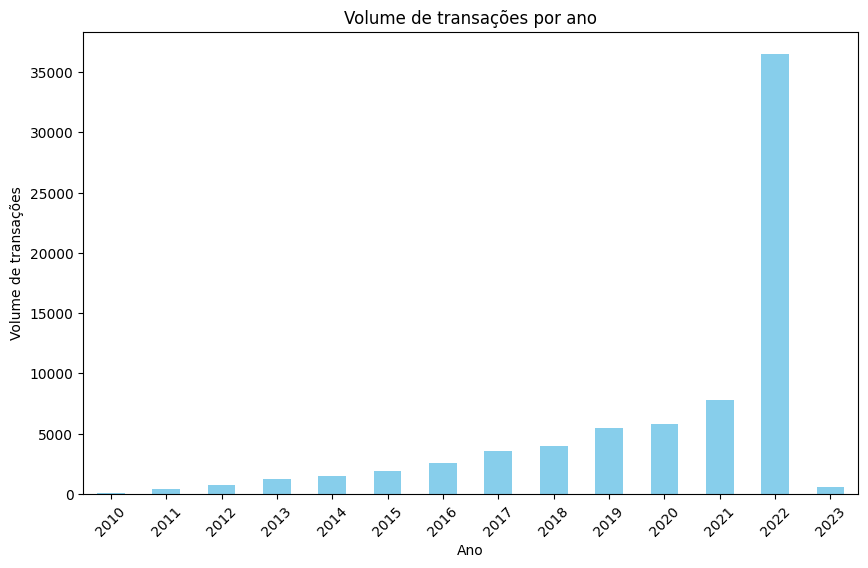

In [97]:
plt.figure(figsize=(10,6))
volume_transacoes_ano.plot(kind='bar', color='skyblue')
plt.title('Volume de transações por ano')
plt.xlabel('Ano')
plt.ylabel('Volume de transações')
plt.xticks(rotation=45)
plt.show()

In [98]:
resumo_transacoes = pd.DataFrame({
    'Volume de Transações': volume_transacoes_ano,
    'Valor Total das Transações': valor_transacoes_ano
})
resumo_transacoes

,Volume de Transações,Valor Total das Transações
ano,,
2010,93,28666.50
2011,367,416235.09
2012,734,723934.39
2013,1249,850661.15
2014,1503,1067881.92
2015,1897,1050124.90
2016,2604,940687.20
2017,3554,2665821.73
2018,3945,2492171.95


Volume das transações por mes

In [99]:
transacoes['ano_mes'] = transacoes['data_transacao'].dt.to_period('M')
transacoes['ano_mes']

0        2020-05
1        2021-06
2        2020-05
3        2020-09
4        2020-10
          ...   
71994    2022-12
71995    2022-12
71996    2012-05
71997    2015-09
71998    2022-12
Name: ano_mes, Length: 71999, dtype: period[M]

In [100]:
volume_transacoes_mes = transacoes.groupby('ano_mes').size()
volume_transacoes_mes

ano_mes
2010-02        2
2010-03        8
2010-05        2
2010-06        6
2010-07        6
           ...  
2022-09     1230
2022-10     1372
2022-11     1841
2022-12    25319
2023-01      559
Freq: M, Length: 155, dtype: int64

In [101]:
valor_transacoes_mes = transacoes.groupby('ano_mes')['valor_transacao'].sum()
valor_transacoes_mes

ano_mes
2010-02        116.01
2010-03       1566.96
2010-05         15.06
2010-06       9869.88
2010-07        270.34
              ...    
2022-09     413649.09
2022-10      97435.74
2022-11     921909.10
2022-12    4792582.69
2023-01      57191.71
Freq: M, Name: valor_transacao, Length: 155, dtype: float64